In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import seaborn as sns 
data=pd.read_csv('spam.csv',encoding='latin-1')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [68]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [70]:
data=data.dropna(axis=1)

In [71]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
data.columns=['label','masseges']

In [73]:
data.head()

,label,masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [75]:
data.head()

,label,masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
data['length']=data['masseges'].apply(len)

In [77]:
data.head()

,label,masseges,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


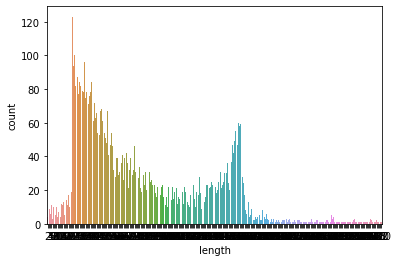

In [78]:
sns.countplot(x='length',data=data)

In [80]:
data.head()

,label,masseges,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
data['masseges'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [82]:
len(data['masseges'])

5572

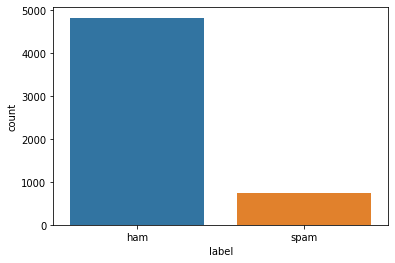

In [83]:
sns.countplot(x='label',data=data)

In [84]:
data=data[['label','masseges']]

In [40]:
import nltk

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [43]:
ps=PorterStemmer()
Wn=WordNetLemmatizer()

In [44]:
string=['A paragraph is a series of related sentences developing a central idea, \n called the topic. Tryto think about paragraphs in terms of thematic unity: a paragraph is a sentence or a group of sentences that supports one central, unified idea. Paragraphs add one idea at a time to your broader argument']

In [45]:
print(string)

['A paragraph is a series of related sentences developing a central idea, \n called the topic. Tryto think about paragraphs in terms of thematic unity: a paragraph is a sentence or a group of sentences that supports one central, unified idea. Paragraphs add one idea at a time to your broader argument']


In [46]:
corpus=[]
for i in range(len(data)):
    review=re.sub("[^a-zA-BZ]"," ",data['masseges'][i])
    review=review.lower()
    review=review.split()
    #review=[Wn.lemmatize(c) for c in review if c not in stopwords.words('english')]
    review=[ps.stem(c) for c in review if c not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [47]:
corpus

['jurong point crazi avail bugi n great world la e buffet ine got amor wat',
 'k lar oke wif u oni',
 'ree entri wkli comp win final tkt st ay ext receiv entri question std txt rate appli',
 'dun say earli hor c alreadi say',
 'ah think goe usf live around though',
 'ree sg ey darl week word back like fun still b ok x std chg send rcv',
 'ven brother like speak hey treat like aid patent',
 'per request ell ell ru innaminungint urungu ettam set callertun aller ress copi friend allertun',
 'valu network custom select receivea prize reward claim call laim code alid hour',
 'ad mobil month entitl pdate latest colour mobil camera ree obil pdate',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'chanc win rom pound txt send ost p day day sand appli epli info',
 'ou week membership rize ackpot xt word www dbuk net b',
 'search right word thank breather promis wont take help grant fulfil promis ou wonder bless time',
 '',
 'obil ovi lub use credit click link next txt mes

In [48]:
data['corpus']=corpus

In [49]:
data.head()

,label,masseges,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazi avail bugi n great world la...
1,ham,Ok lar... Joking wif u oni...,k lar oke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,ree entri wkli comp win final tkt st ay ext re...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",ah think goe usf live around though


In [50]:
y=pd.get_dummies(data['label'])
y.head()
y=y['spam']
y=pd.DataFrame(y)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv=CountVectorizer(max_features=None)
#cv=TfidfTransformer()
X=cv.fit_transform(corpus).toarray()

In [66]:
X.shape

(5572, 6314)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11)

In [68]:
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB()

In [69]:
naive.fit(x_train,y_train)
y_predict=naive.predict(x_test)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.metrics import confusion_matrix,classification_report,r2_score
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(r2_score(y_test,y_predict))

[[1430   32]
 [  12  198]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1462
           1       0.86      0.94      0.90       210

    accuracy                           0.97      1672
   macro avg       0.93      0.96      0.94      1672
weighted avg       0.98      0.97      0.97      1672

0.7603804312422644
